# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Your code here
data=pd.read_csv('data_all.zip')
data.head(20)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Yonatan habló de alrededor de 60 etiquetas, parece que son 62
lista=list(data.e.unique())
lista=sorted(lista)
lista

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0]

In [4]:
print(len(lista))

62


In [5]:
#Si no entiendo mal (para variar), ahora debemos checar y trabajar
#con una matriz del dataframe...
matriz=data.values
#Vemo las dimensiones
matriz.shape

(116322, 785)

#### Ahora habrá que revisar qué son las imágenes de las letras...

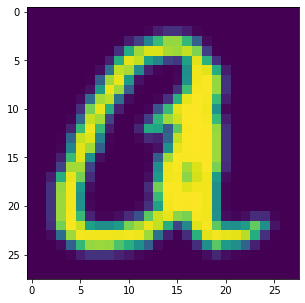

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(matriz[0,1:].reshape(28,28))
plt.show();

In [7]:
#Le e corresponde a las etiquetas, la de esta letra es entonces:
print(data.e[0])

36.0


36.0


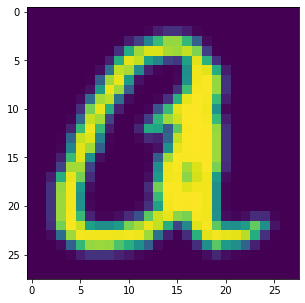

0.0


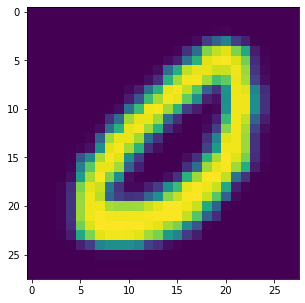

3.0


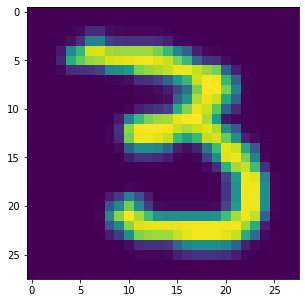

33.0


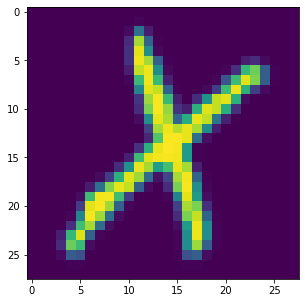

30.0


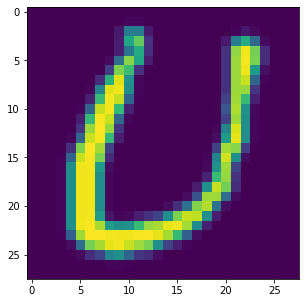

24.0


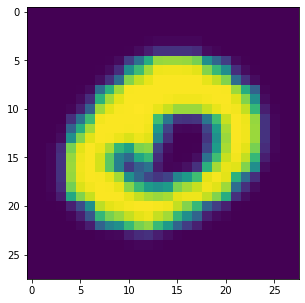

40.0


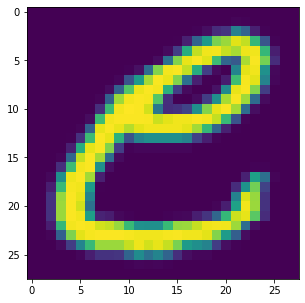

5.0


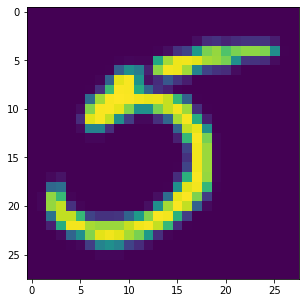

8.0


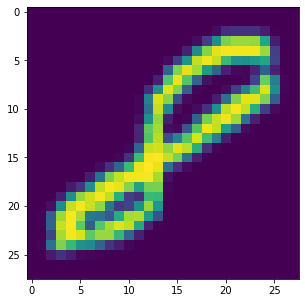

2.0


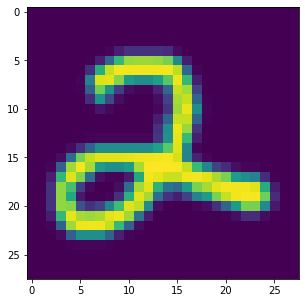

4.0


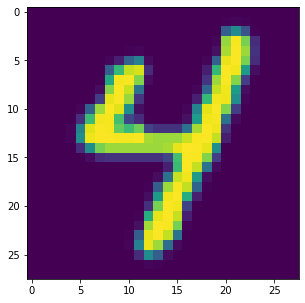

2.0


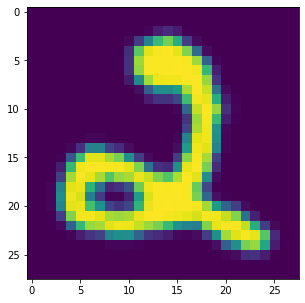

47.0


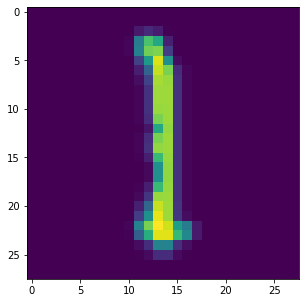

2.0


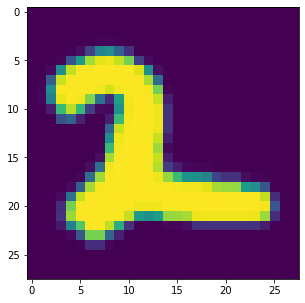

3.0


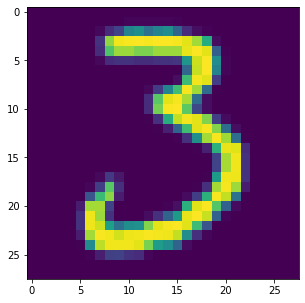

7.0


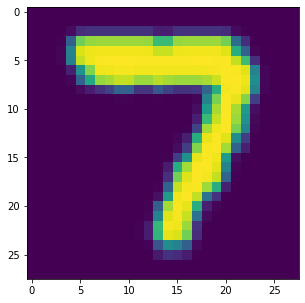

32.0


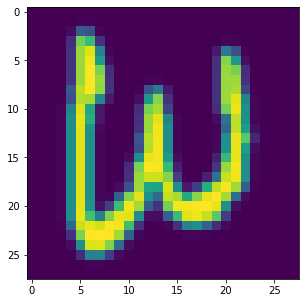

7.0


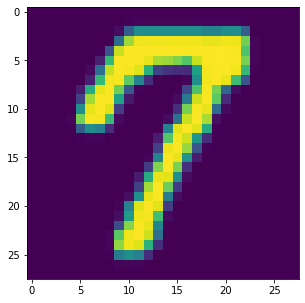

5.0


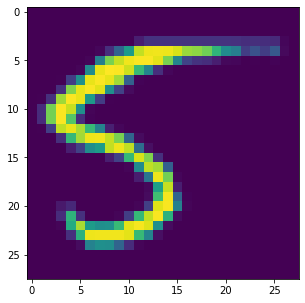

3.0


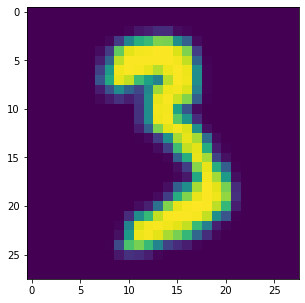

60.0


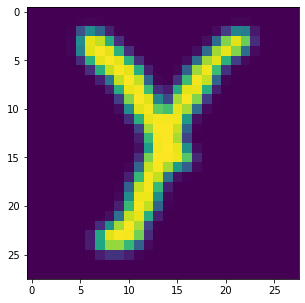

18.0


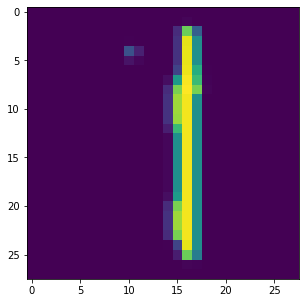

46.0


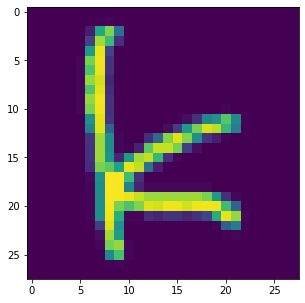

18.0


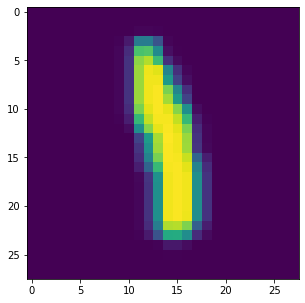

36.0


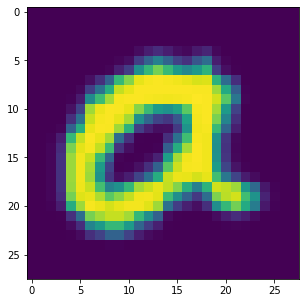

59.0


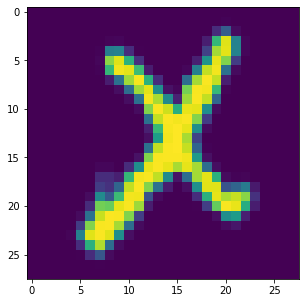

12.0


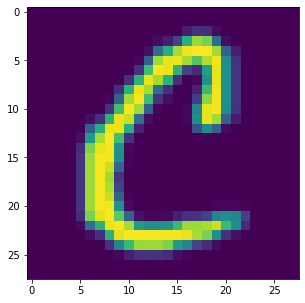

37.0


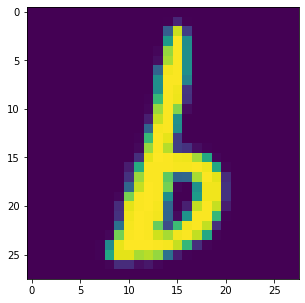

7.0


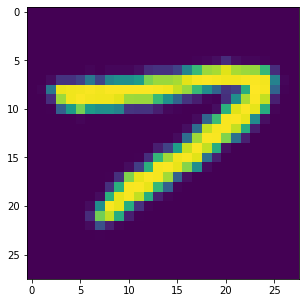

53.0


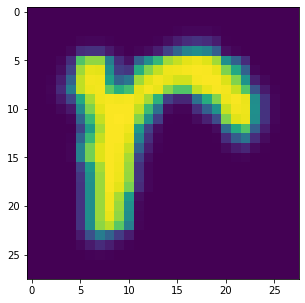

7.0


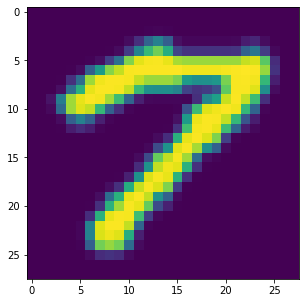

15.0


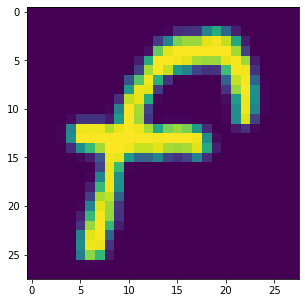

1.0


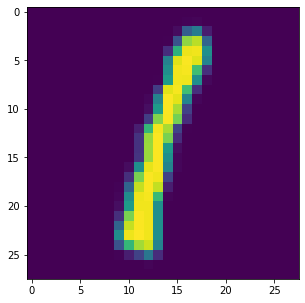

9.0


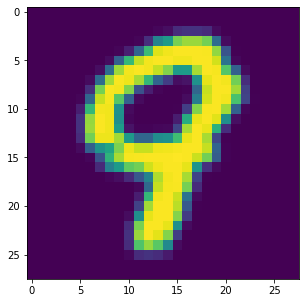

38.0


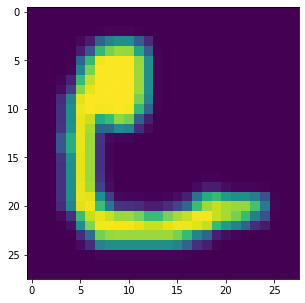

43.0


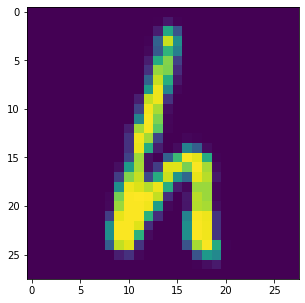

44.0


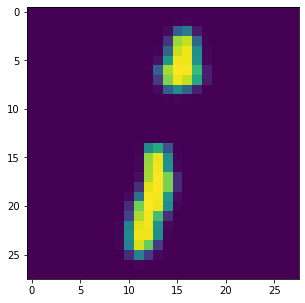

8.0


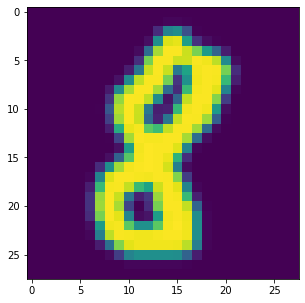

5.0


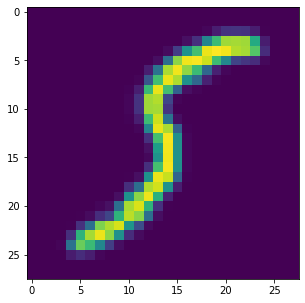

40.0


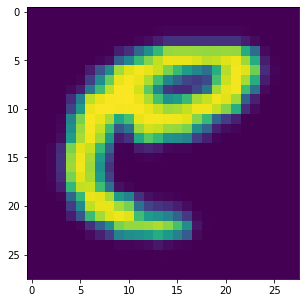

7.0


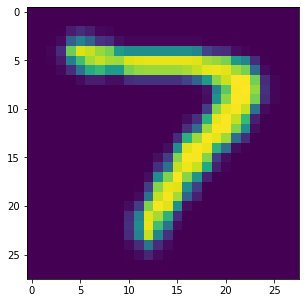

43.0


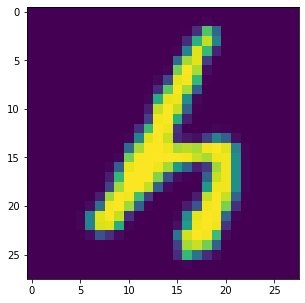

19.0


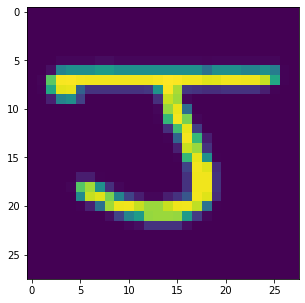

7.0


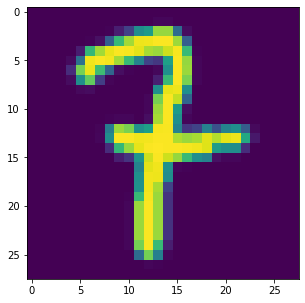

55.0


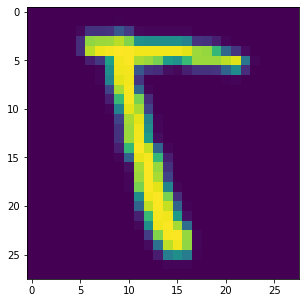

24.0


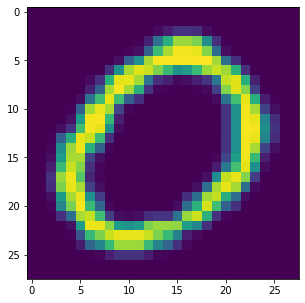

24.0


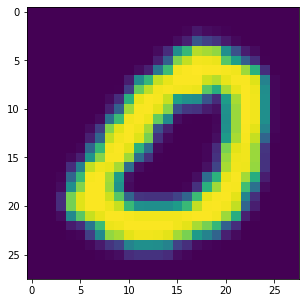

30.0


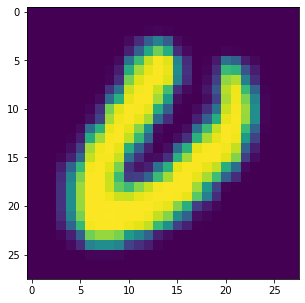

6.0


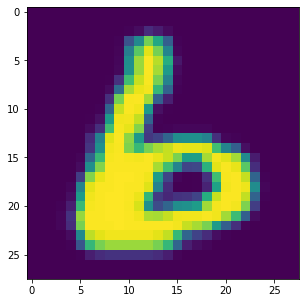

8.0


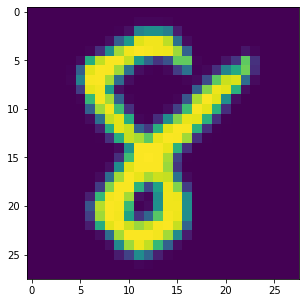

4.0


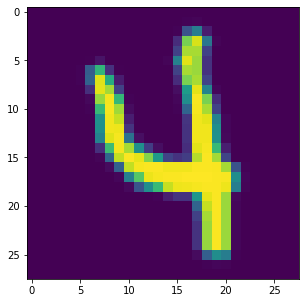

47.0


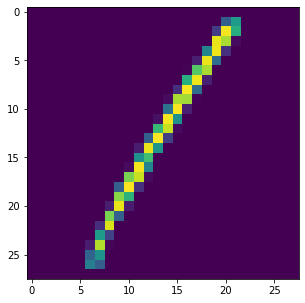

5.0


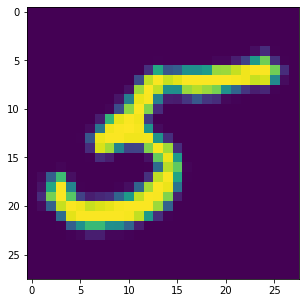

9.0


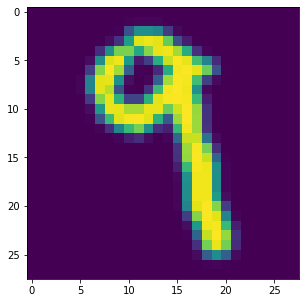

55.0


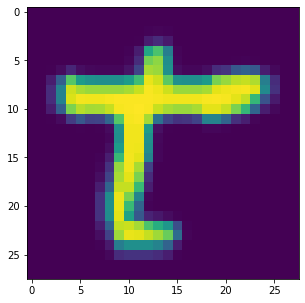

58.0


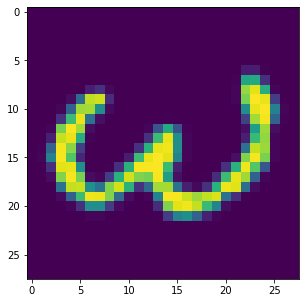

1.0


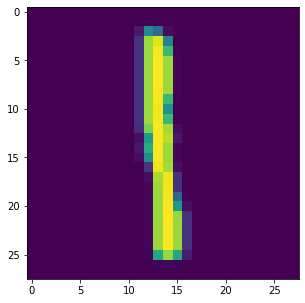

8.0


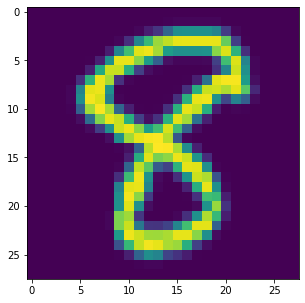

41.0


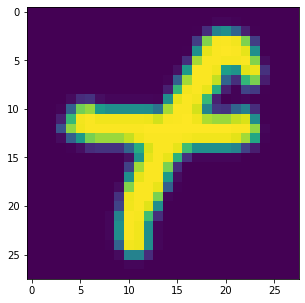

20.0


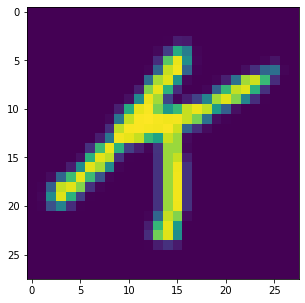

29.0


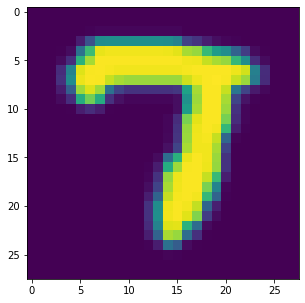

0.0


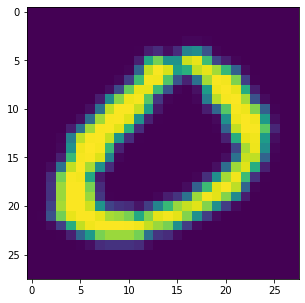

In [8]:
for indice in lista:
    plt.figure(figsize=(5,5))
    plt.imshow(matriz[int(indice), 1:].reshape(28,28))
    print(data.e[indice])
    plt.show()

##### Se nota que lo números van del 0 al 9, las minúsculas comienzan a partir del 36, las mayúsculas deberían iniciar en el 10...

In [9]:
#Importaciones de librerías del sklearn...
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNNC

import warnings
warnings.simplefilter("ignore")

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [10]:
# Your code here
#Si estoy en lo correcto, entonces las mayúsculas deben
#estar entre e=10 y e =37...
mayusculas=data[(data.e>=10)&(data.e<=37)]
mayusculas.shape

(33842, 785)

In [11]:
#Obtenemos X e y...
X=mayusculas.iloc[:,1:]
y=mayusculas.iloc[:,0]

In [12]:
#Sacamos el Xtrain,ytrain,Xtest y y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

### Regresión logística mayúsculas

In [13]:

logregr=LogisticRegression(C=0.01,penalty='l2',tol=0.0001,max_iter=70,
                           solver='lbfgs',multi_class='multinomial')
logregr.fit(X_train,y_train)
logregr.score(X_train,y_train)

0.8634432829756584

In [14]:
#Ahora vemos con el test...
logregr.score(X_test,y_test)

0.8249372137686513

### Bayesiano ingenuo mayúsculas

In [15]:

gnb=GNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

0.494145458574964

In [16]:
gnb.score(X_test,y_test)

0.4923917860836165

### Clasificador de vecinos mayúsculas

In [17]:
knnc=KNNC(n_neighbors=5,n_jobs=-1)
knnc.fit(X_train,y_train)
train_score=knnc.score(X_train,y_train)

In [18]:
print(train_score)

0.9116832268311602


In [19]:
test_score=knnc.score(X_test,y_test)
print(test_score)

0.8762003250110799


* Try to do the same thing with lowercases.

In [20]:
# Your code here
minusculas=data[(data.e>=38)]
minusculas.shape

(24562, 785)

In [21]:
#Obtenemos X e y...
X=mayusculas.iloc[:,1:]
y=mayusculas.iloc[:,0]

In [22]:
#Sacamos el Xtrain,ytrain,Xtest y y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

### Regresión logística minúsculas

In [23]:
logregr=LogisticRegression(C=0.01,penalty='l2',tol=0.0001,max_iter=70,
                           solver='lbfgs',multi_class='multinomial')
logregr.fit(X_train,y_train)
logregr.score(X_train,y_train)

0.8621874191999409

In [24]:
#Ahora vemos con el test...
logregr.score(X_test,y_test)

0.8221302998965874

### Bayesiano ingenuo minusculas

In [25]:
gnb=GNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

0.48077420308055996

In [26]:
gnb.score(X_test,y_test)

0.46461811198109026

### Clasificador de vecinos minusculas

In [27]:
knnc=KNNC(n_neighbors=5,n_jobs=-1)
knnc.fit(X_train,y_train)
train_score=knnc.score(X_train,y_train)

print(train_score)

0.9113138551324198


In [28]:
test_score=knnc.score(X_test,y_test)
print(test_score)

0.8769389865563598


* Try to do the same thing with numbers.

In [33]:
# Your code here
numeros=data[(data.e<=9)]
numeros.shape

(57918, 785)

In [34]:
#Obtenemos X e y...
X=numeros.iloc[:,1:]
y=numeros.iloc[:,0]

In [35]:
#Sacamos el Xtrain,ytrain,Xtest y y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

### Regresión logística numeros

In [36]:
logregr=LogisticRegression(C=0.01,penalty='l2',tol=0.0001,max_iter=70,
                           solver='lbfgs',multi_class='multinomial')
logregr.fit(X_train,y_train)
logregr.score(X_train,y_train)

0.9444036776449259

In [37]:
#Ahora vemos con el test...
logregr.score(X_test,y_test)

0.9351691988950276

### Bayesiano ingenuo numeros

In [38]:
gnb=GNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

0.6527819743600811

In [39]:
gnb.score(X_test,y_test)

0.6500345303867403

### Clasificador vecinos numeros

In [40]:
knnc=KNNC(n_neighbors=5,n_jobs=-1)
knnc.fit(X_train,y_train)
train_score=knnc.score(X_train,y_train)

print(train_score)

0.9801010057409246


In [41]:
test_score=knnc.score(X_test,y_test)
print(test_score)

0.9718577348066298


### Conclusión
##### El método el de vecinos y la regresión lógica resultaron buenos, el bayesiano fué el más jodidón...